# 페이지처리 & 이미지 스크랩핑

In [3]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version: 1.20.1
pandas version: 1.2.4


In [203]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError
import requests
import re

### - 네이버 영화 평점에 대한 스크래핑 & 시각화

- //*[@id="old_content"]/table/tbody/tr[2]/td[1] : copy-> copy Xpath로 가져온것
- old_content > table > tbody > tr:nth-child(2) > td:nth-child(1) : copy-> copy selector로 가져온것

In [6]:
try:
    html=urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210913')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210913" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [26]:
# 첫번째 영화제목만 추출
soup.find_all('td',{'class':'title'})[0].a.text

'코다'

In [31]:
# 첫번째 영화의 평점 추출
#soup.find_all('td',{'class':'point'})[0].text
soup.find('td','point').text # 이런식으로도 가져올수 있음! 

'9.35'

### 영화이름과 평점을 이용한 데이터프레임을 생성해보자!

In [40]:
table = soup.find_all('td',{'class','title'})
table

[<td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10249" title="모던 타임즈">모던 타임즈</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10341" title="위대한 독재자">위대한 독재자</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19335" title="해피 투게더">해피 투게더</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=173692" title="바울">바울</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=190324" title="프리 가이">프리 가이</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=200896" title="꽃다발 같은 사랑을 했다">꽃다발 같은 사랑을 했다</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=30796" title="번

In [54]:
movie_title=[soup.find_all('div',{'class':'tit5'})[idx].a.get_text() for idx in range(0,45)]
print('len:',len(movie_title))
print(movie_title)

len: 45
['코다', '모던 타임즈', '위대한 독재자', '해피 투게더', '바울', '프리 가이', '꽃다발 같은 사랑을 했다', '번지 점프를 하다', '윤희에게', '신세계', '이별의 아침에 약속의 꽃을 장식하자', '중경삼림', '너의 이름은.', '부에나 비스타 소셜 클럽', '화양연화', '캡틴 판타스틱', '드림걸즈', '분노', '너와 파도를 탈 수 있다면', '노매드랜드', '블랙 위도우', '아비정전', '너의 췌장을 먹고 싶어', '모가디슈', '우리의 20세기', '이스케이프 룸 2: 노 웨이 아웃', '릴리 슈슈의 모든 것', '하나와 앨리스', '너의 췌장을 먹고 싶어', '맨 인 더 다크 2 ', '날씨의 아이', '소셜 네트워크', '그린 나이트', '독전', '기담', '호우시절', '인질', '더 수어사이드 스쿼드', '레미니센스', '악녀', '싱크홀', '올드', '샹치와 텐 링즈의 전설', '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?', '귀문']


In [57]:
movie_point=[soup.find_all('td',{'class':'point'})[idx].get_text() for idx in range(0,45)]
print('len:',len(movie_point))
print(movie_point)

len: 45
['9.35', '9.32', '9.23', '9.19', '9.17', '9.10', '9.08', '8.98', '8.96', '8.93', '8.91', '8.91', '8.80', '8.78', '8.77', '8.59', '8.58', '8.55', '8.53', '8.48', '8.47', '8.47', '8.39', '8.33', '8.25', '8.16', '8.11', '8.10', '8.10', '8.04', '7.95', '7.84', '7.60', '7.52', '7.49', '7.40', '7.36', '7.08', '7.03', '6.97', '6.78', '6.72', '6.66', '6.51', '4.47']


In [71]:
# 임의의 날짜를 생성해본다면?
movie_date=pd.date_range('2021-09-14',periods=45)
movie_date

DatetimeIndex(['2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
               '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23',
               '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28'],
              dtype='datetime64[ns]', freq='D')

In [72]:
movie_frm = pd.DataFrame({
    'date' : movie_date,
    'title': movie_title,
    'point': movie_point
})
movie_frm.head() 

,date,title,point
0,2021-09-14,코다,9.35
1,2021-09-15,모던 타임즈,9.32
2,2021-09-16,위대한 독재자,9.23
3,2021-09-17,해피 투게더,9.19
4,2021-09-18,바울,9.17


In [73]:
movie_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    45 non-null     datetime64[ns]
 1   title   45 non-null     object        
 2   point   45 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ KB


In [77]:
movie_frm['point']=movie_frm['point'].astype(float)

In [78]:
movie_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    45 non-null     datetime64[ns]
 1   title   45 non-null     object        
 2   point   45 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


### 특정영화에 대한 리뷰를 담는 데이터프레임을 생성해보자!
- 점수(별점), 리뷰제목, 작성자, 닉네임, 작성날짜, 리뷰내용

In [79]:
try:
    html=urlopen('https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/title/tt4154756/reviews" rel="canonical"/>


In [81]:
table = soup.find_all('div',{'class':'lister-item-content'})
table 

[<div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>10</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw6692429/"> Better than Endgame
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur128816687/">grztxks</a></span><span class="review-date">14 March 2021</span>
 </div>
 <div class="content">
 <div class="text show-more__control">Infinity war is one of the best MCU protects. It has a great story, great acting, and awesome looking. If you aren't a Marvel fan or haven't watched most of the previous MCU movies this h

In [134]:

#점수(별점), 리뷰제목, 작성자, 닉네임, 작성날짜, 리뷰내용

title=[]
writer=[]
point=[]
content=[]
date=[]
for div in soup.find_all('div',{'class':'lister-item-content'}):
    #if div.find('a'):
        title.append(div.find('a').text)
    #if div.find('span'):
        #print(div.find('span').text.strip())
        point.append(div.find('span').text.strip())
    #if div.find('span',{'class':'display-name-link'}):
        #print(div.find('span',{'class':'display-name-link'}).text)
        writer.append(div.find('span',{'class':'display-name-link'}).text)
    #if div.find('span',{'class':'review-date'}):
        #print(div.find('span',{'class':'review-date'}).text)
        date.append(div.find('span',{'class':'review-date'}).text)
    #if div.find('div',{'class':'text show-more__control'}):
        #print(div.find('div',{'class':'text show-more__control'}).text)
        content.append(div.find('div',{'class':'text show-more__control'}).text)


In [148]:
# 주석 지운 버전
title=[]
writer=[]
point=[]
content=[]
date=[]
for div in soup.find_all('div',{'class':'lister-item-content'}):    
        title.append(div.find('a').text)
        point.append(div.find('span').text.strip())
        writer.append(div.find('span',{'class':'display-name-link'}).text)
        date.append(div.find('span',{'class':'review-date'}).text)   
        content.append(div.find('div',{'class':'text show-more__control'}).text)


In [149]:
print("title len:",len(title))
print("writer len:",len(writer))
print("point len:",len(point))
print("content len:",len(content))
print("date len:",len(date))

title len: 25
writer len: 25
point len: 25
content len: 25
date len: 25


In [150]:
movie_frm = pd.DataFrame({
    '리뷰제목':title,
    '작성자':writer,
    '별점':point,
    '리뷰내용':content,
    '작성날짜':date
})
movie_frm.head()

,리뷰제목,작성자,별점,리뷰내용,작성날짜
0,Better than Endgame\n,grztxks,10/10,Infinity war is one of the best MCU protects. ...,14 March 2021
1,A film that pulled off the impossible.\n,cartermain,cartermain,Avengers: Infinity War is a film that should b...,20 January 2021
2,EPIC\n,lalit28595,10/10,Infinity war seemed much better than endgame t...,27 July 2021
3,"Best movie of the MCU, incredible from start ...",RJBrez,10/10,Infinity War is remembered mostly for how it e...,24 January 2021
4,Best Cliffhanger of all Time\n,Alex_Lo,10/10,A meticulously planned film down to the last d...,5 February 2021


In [151]:
movie_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰제목    25 non-null     object
 1   작성자     25 non-null     object
 2   별점      25 non-null     object
 3   리뷰내용    25 non-null     object
 4   작성날짜    25 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [154]:
# 형변환
movie_frm['작성날짜'] = pd.to_datetime(movie_frm['작성날짜'])

In [155]:
movie_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   리뷰제목    25 non-null     object        
 1   작성자     25 non-null     object        
 2   별점      25 non-null     object        
 3   리뷰내용    25 non-null     object        
 4   작성날짜    25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ KB


### 페이지 처리 방법 익히기

In [162]:
from time import sleep,time
from random import randint
from IPython.core.display import clear_output

In [164]:
start_time = time()
requests = 0
for idx in range(5):
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time-start_time
    print('request : {} , frequency :{}'.format(requests, requests/elapsed_time))
    clear_output(wait=True) # 전에 처리된 항목은 제거하고 다음 것 실행할수 있게 해준다.

request : 5 , frequency :0.4143404758583655


### 네이버에서 파이썬 검색후 파워링크부분 페이지처리해서 가져와보기
#### 페이지수를 아는 경우 for문으로 처리 

In [165]:
try:
    html=urlopen('https://ad.search.naver.com/search.naver?where=ad&sm=svc_nrs&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&referenceId=hRsbhlprvOsss4Ws7ndssssstrV-311722&pagingIndex=1')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup=BeautifulSoup(html.read(),'html.parser')
    print(soup)

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="always" name="referrer"/>
<title>파이썬 :: 네이버 검색광고</title>
<link href="https://ssl.pstatic.net/adimg3.search/imp/nx/moread/power_contents/200523/css/search.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/adimg3.search/imp/nx/moread/power_contents/css/api_setkr_ad_ssl.css" rel="stylesheet" type="text/css"/>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/js/clickcr.js" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/imp/nx/moread/power_contents/190221_1/js/jindo_1.5.3_171116.js?1" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/ac/nhn.autocomplete.component_130613.js" type="text/javascript"></script>
<script charset="UTF-8" src="https://ssl.pstatic.net/adimg3.search/js/jindo_component.js" type="text/javascript"></scri

In [178]:
# 첫번째 링크의 이름만 가져와보기
soup.find('a',{'class','lnk_tit'}).text

'그린컴퓨터아트학원공식홈페이지'

In [180]:
pages=[str(i) for i in range(1,7)]
print(pages)

['1', '2', '3', '4', '5', '6']


In [190]:
start_time = time()
requests = 0
title_list=[]
for page in pages:
    url = "https://ad.search.naver.com/search.naver?where=ad&sm=svc_nrs&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&referenceId=hRsbhlprvOsss4Ws7ndssssstrV-311722&pagingIndex="+page
    #print(url)
    html=urlopen(url)
    soup=BeautifulSoup(html.read(),'html.parser')
    title_txt=[title.text for title in soup.find_all('a',{'class':'lnk_tit'})]
    title_list.extend(title_txt) # append사용시 오류발생.
    
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time-start_time
    print('request : {} , frequency :{}'.format(requests, requests/elapsed_time))
    clear_output(wait=True)


request : 6 , frequency :0.33535000479322263


#### append vs extend
- list.append(x) : 리스트 끝에 x 1개를 그대로 추가
- list.extend(iterable) : 인자로 전달된 iterable의 모든 아이템을 리스트에 추가,iterable이기 때문에 list, tuple 모두 가능

In [191]:
title_list

['그린컴퓨터아트학원공식홈페이지',
 '메가 IT 파이썬',
 '42 서울 이노베이션아카데미',
 '강남아이티아카데미학원',
 '전세계에서 듣는 Udemy',
 '디랩 가을학기 개강 체험수업',
 '메가스터디IT아카데미 강남',
 '52년 역사 중앙정보처리학원',
 '서울산업진흥원, DT스쿨!',
 'AI 무료교육 영우글로벌러닝',
 '에이콘아카데미종로학원 공식홈',
 '그린컴퓨터아카데미 강남캠퍼스',
 'KG에듀원이룸 파이썬 인강',
 'SBS아카데미컴퓨터아트학원',
 '애플리케이션 모니터링은 와탭',
 '카페24 파이썬',
 '가비아 파이썬 호스팅 오픈',
 'IT전문교육 IT뱅크 김서균',
 '굿잡컴퓨터아트학원',
 '국비IT교육 KH정보교육원',
 '강남 그린컴퓨터아카데미',
 '코리아IT아카데미 김형준',
 '코드잇 무제한 멤버십',
 '코리아IT아카데미 지혜지',
 '스파르타코딩클럽 웹개발종합반',
 '구로 오라클자바교육센터',
 '한국정보기술연구원- 인프라',
 '어소트락 파이썬',
 '한국소프트웨어인재개발원',
 '세상의 모든 티칭, 올티칭',
 '현직자 실무교육,인프런',
 '더조은컴퓨터아카데미 공식',
 '로봇클럽 코딩클럽',
 '패스트캠퍼스 파이썬 다모아썬',
 '파이썬 인강 아이티동스쿨',
 '파이썬 인강 인터넷강의',
 '빅데이터 분석 솔루션 텍스톰',
 '쿨사인 딥러닝 AI개발',
 '박세훈 N잡 빅데이터 강의',
 '파이썬 탈잉!',
 'KG아이티뱅크 교육상담 김구',
 '해피칼리지와 하반기 레벨업 ',
 '아이티뱅크 국비무료 방문상담',
 '우송대 AI/빅데이터학과',
 '파이썬, 클래스101',
 '티몬 파이썬',
 '파이썬-이샘코딩전문학원',
 '파이썬 씨스꿀',
 'KG에듀원 KG아이티뱅크',
 '파이썬추천학원 이젠아카데미',
 '파이썬 전문가, 크몽',
 '파이썬 전문 교육 박민정',
 '메가스터디IT아카데미 조동민',
 'KG아이티뱅크 진정헌',
 'SBS아카데미컴퓨터학원송재현',
 '대학인강 대표 유니와이즈',
 '11번

### 이미지 로컬저장소에 저장하기 (selenium 사용)
- 다음에서 시츄 검색후 시츄이미지 추출해오기

In [208]:
from selenium import webdriver
import time
driver = webdriver.Chrome('C:/Users/whgud/driver/chromedriver_win32/chromedriver.exe')
driver.get('https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=%EC%8B%9C%EC%B8%84')

images = driver.find_elements_by_css_selector('#imgList > div > a > img')
print(images)
img_url=[]
for image in images :
    url=image.get_attribute('src') # selenium의 객체라서 접근방식이 다름.
    img_url.append(url)

[<selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="c9a80e68-86bb-4b99-8431-3cf87d2d3fc3")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="92b37565-bc1a-49f5-a85e-4b957f46e8dc")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="b9be3532-614b-497b-b859-75a12b1cbead")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="3ab3d2a5-0987-4cfb-844c-e45b0ce3dba7")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="d474a729-cdbe-4ae3-acd5-42259741167b")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="86d09e50-287b-486c-8cd5-01744347ec80")>, <selenium.webdriver.remote.webelement.WebElement (session="b84038eed1a8025daec1050f83d5c2ad", element="bbe9bcd7-61b8-4ad8-b0b2-36cff3f5

In [210]:
import os
img_forder = 'C:/Users/whgud/img'
if not os.path.isdir(img_forder):
    os.mkdir(img_forder)
    
for idx, link in enumerate(img_url):
    #print(idx,'---',link)
    urlretrieve(link, f'C:/Users/whgud/img/{idx}.png')

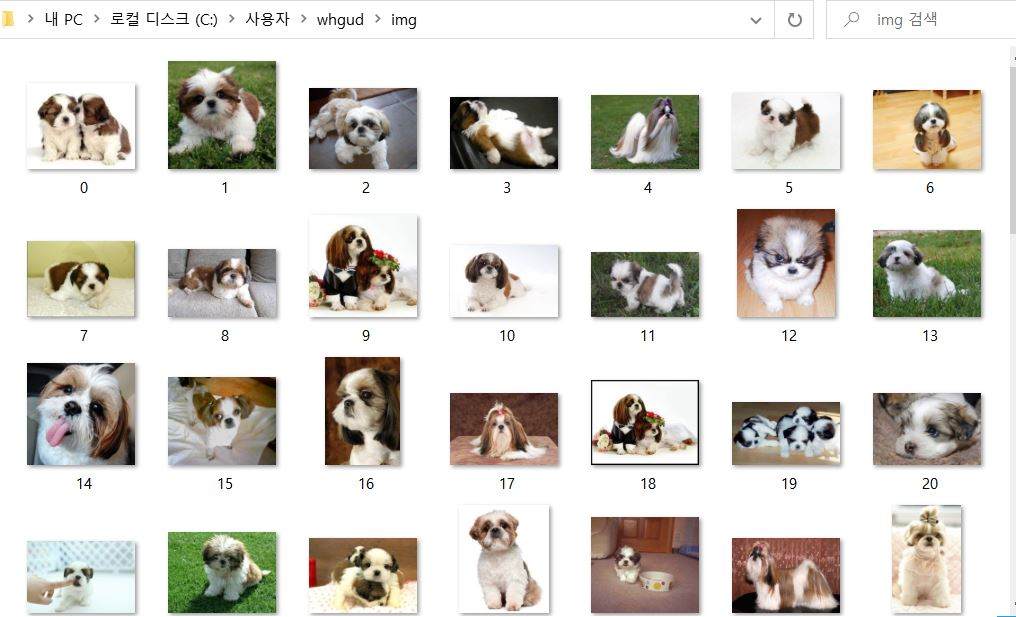

In [211]:
# 실행결과
from IPython.display import Image
Image('C:/Users/whgud/img/실행결과.jpg', width=700)

### 비정형 데이터를 이용한 몽고디비 활용방법

- Not only SQL(NoSQL)
- 정해진 규칙이 없다(schema X)
- join 없음
- key : value 데이터를 담는다
- Database - Collection(table) -  Document(row, record)

In [213]:
import pymongo as mongo

#### 1. MongoDB와 connection

In [214]:
conn=mongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

#### 2. Database Create

In [215]:
db=conn.articleDB
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'articleDB')

#### 3. Collection Create

In [216]:
article_collection = db['article']
article_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'articleDB'), 'article')

#### 4. CRUD
- Document Insert하는 방법
    - pymongo : insert_one() 
    - shell   : insertOne()
    - pymongo : insert_many()
    - shell   : insertMany()

In [217]:
document01={
    'author':'suyeon',
    'subject':'mongodb',
    'content':'몽고디비활용방법',
    'tags':['mongodb','python','Nosql'],
    'view':50
}

In [218]:
article_collection.insert_one(document01)

- Document select하는 방법
    - pymongo : find_one() 
    - shell   : find({})
    - pymongo : find()
    - shell   : find()

In [219]:
article_collection.find_one() # document 1개가 꺼내짐.

{'_id': ObjectId('61403cf981905459282a6d9d'),
 'author': 'suyeon',
 'subject': 'mongodb',
 'content': '몽고디비활용방법',
 'tags': ['mongodb', 'python', 'Nosql'],
 'view': 50}

In [220]:
article_collection.find() # resultset으로 꺼내짐.

In [221]:
document02={
    'author':'admin',
    'subject':'인공지능',
    'content':'garbage in garbage out',
    'tags':['mongodb','python','Nosql'],
    'view':50
}

In [222]:
article_collection.insert_one(document02)

In [223]:
article_collection.find_one()  # 첫번째꺼만 꺼내짐

{'_id': ObjectId('61403cf981905459282a6d9d'),
 'author': 'suyeon',
 'subject': 'mongodb',
 'content': '몽고디비활용방법',
 'tags': ['mongodb', 'python', 'Nosql'],
 'view': 50}

In [226]:
cursor = article_collection.find()

In [227]:
for doc in cursor:  # resultset으로 반환되는거 활용해서 for문으로 한개씩 꺼낼수 있음.
    print(doc)
    print('*'*50)

{'_id': ObjectId('61403cf981905459282a6d9d'), 'author': 'suyeon', 'subject': 'mongodb', 'content': '몽고디비활용방법', 'tags': ['mongodb', 'python', 'Nosql'], 'view': 50}
**************************************************
{'_id': ObjectId('61403e3681905459282a6d9e'), 'author': 'admin', 'subject': '인공지능', 'content': 'garbage in garbage out', 'tags': ['mongodb', 'python', 'Nosql'], 'view': 50}
**************************************************


In [228]:
document03={
    'author':'admin',
    'subject':'인공지능',
    'content':'garbage in garbage out',
    'tags':['mongodb','python','Nosql'],
    'view':200
}
article_collection.insert_one(document03)

In [231]:
# find할때 조건을 줄 수 있음!  - author가 admin이고, view가 150 이상인 경우
cursor = article_collection.find({'author':'admin','view':{'$gte':150}}) # $gte -> greater than 
for doc in cursor:
    print(doc)
    print('*'*50)

{'_id': ObjectId('61403f0b81905459282a6d9f'), 'author': 'admin', 'subject': '인공지능', 'content': 'garbage in garbage out', 'tags': ['mongodb', 'python', 'Nosql'], 'view': 200}
**************************************************
